### Data Analysis using Pandas, Seaborn and Matplotlib

In this notebook we want to answer essentially to the following questions:

- What was the best month for sales? How much was earned that month?
- What city sold the most product?
- What time should we display advertisments to maximaze the likehood of customer's buying product?
- what products are most often sold together?
- What product sold the most? Why do you it sold the most?

This project was inspired by [Keith Galli](https://www.youtube.com/watch?v=eMOA1pPVUc4&t=121s). This notebook is my personal approach to the same task.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from glob import glob
import seaborn as sns

In [3]:
# Reading the data
path_to_csv_files = './Sales_Data/'
monthly_dataframes = [pd.read_csv(file) for file in glob(path_to_csv_files+'*.csv')]
all_sales_df = pd.concat(monthly_dataframes)

In [4]:
all_sales_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


### Handling missing values


In [5]:
# Missing values
for column in all_sales_df.columns:
    if all_sales_df[column].isnull().sum() > 0:
        missing_value = all_sales_df[column].isnull().sum()
        print(f"{column} --> {missing_value}")

# all_sales_df.isnull().sum()        

Order ID --> 545
Product --> 545
Quantity Ordered --> 545
Price Each --> 545
Order Date --> 545
Purchase Address --> 545


In [6]:
# Removing the rows that present all NaN values
all_sales_df = all_sales_df.dropna(how='all')
all_sales_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


In [7]:
all_sales_df.shape

(186305, 6)

We need to make some changes. First of all the 'Quantity Ordered' values are going to be replaced by integers. Then we will change the type of 'Price Each' into float.


In [8]:
all_sales_df['Quantity Ordered'].dtype


dtype('O')

In [9]:
all_sales_df['Price Each'].dtype

dtype('O')

In [10]:
all_sales_df['Quantity Ordered'].value_counts()

1                   168552
2                    13324
3                     2920
4                      806
Quantity Ordered       355
5                      236
6                       80
7                       24
8                        5
9                        3
Name: Quantity Ordered, dtype: int64

In [11]:
all_sales_df.loc[all_sales_df['Quantity Ordered'] == 'Quantity Ordered']

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
519,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1149,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1155,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2878,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2893,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
...,...,...,...,...,...,...
10000,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
10387,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
11399,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
11468,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [12]:
all_sales_df = all_sales_df[(all_sales_df['Quantity Ordered'] != 'Quantity Ordered')]


In [13]:
all_sales_df['Quantity Ordered'].value_counts()

1    168552
2     13324
3      2920
4       806
5       236
6        80
7        24
8         5
9         3
Name: Quantity Ordered, dtype: int64

In [14]:
all_sales_df['Quantity Ordered'] = all_sales_df['Quantity Ordered'].astype(int)

In [15]:
# Fixing 'Price Each' column
all_sales_df['Price Each'].value_counts()

11.95     21903
14.95     21658
2.99      20641
3.84      20577
11.99     18882
150       15450
99.99     13325
149.99     7507
700        6804
389.99     6230
379.99     6181
600        5490
300        4780
1700       4702
999.99     4128
109.99     4101
400        2056
600.0      1347
150.0        99
700.0        38
1700.0       22
300.0        20
400.0         9
Name: Price Each, dtype: int64

In [16]:
all_sales_df['Price Each'] = all_sales_df['Price Each'].astype(float)

In [17]:
all_sales_df.dtypes

Order ID             object
Product              object
Quantity Ordered      int64
Price Each          float64
Order Date           object
Purchase Address     object
dtype: object

In [18]:
# Order Date column to datetime
all_sales_df['Order Date'] = pd.to_datetime(all_sales_df['Order Date'])

In [19]:
all_sales_df.dtypes

Order ID                    object
Product                     object
Quantity Ordered             int64
Price Each                 float64
Order Date          datetime64[ns]
Purchase Address            object
dtype: object

### Question 1: What was the best month for sales? How much was earned that month?

In [20]:
# Extract the month from 'Order Date' column
all_sales_df['Month'] = all_sales_df['Order Date'].dt.month
all_sales_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4


In [21]:
all_sales_df.groupby(all_sales_df['Month'])['Price Each'].value_counts()

Month  Price Each
1      11.95         1174
       2.99          1084
       14.95         1071
       3.84          1038
       11.99         1006
                     ... 
12     300.00         663
       1700.00        643
       109.99         567
       999.99         539
       400.00         284
Name: Price Each, Length: 204, dtype: int64

In [22]:
best_sales = all_sales_df['Quantity Ordered'] * all_sales_df['Price Each']

In [23]:
all_sales_df['Sales'] = best_sales
all_sales_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99


In [24]:
all_sales_df.groupby(all_sales_df['Month'])['Sales'].sum()

Month
1     1.822257e+06
2     2.202022e+06
3     2.807100e+06
4     3.390670e+06
5     3.152607e+06
6     2.577802e+06
7     2.647776e+06
8     2.244468e+06
9     2.097560e+06
10    3.736727e+06
11    3.199603e+06
12    4.613443e+06
Name: Sales, dtype: float64

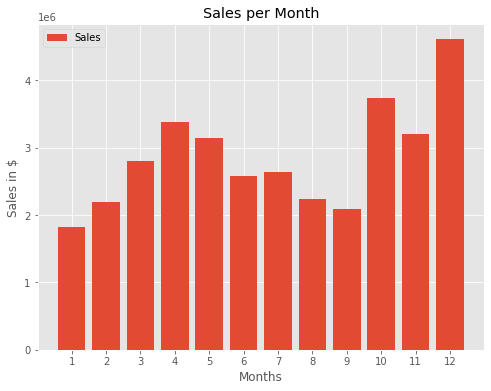

In [25]:
plt.style.use("ggplot")
plt.figure(figsize=(8, 6))
x_indexes = np.arange(1, 13)
y_indexes = all_sales_df.groupby(all_sales_df['Month'])['Sales'].sum()
plt.bar(x_indexes, y_indexes, label='Sales')
plt.xticks(ticks=x_indexes) # fix the indexes on x axis
plt.title("Sales per Month")
plt.xlabel("Months")
plt.ylabel('Sales in $')
plt.legend()

### Question 2: What city sold the most product?

In [26]:
# Extracting the city from purchase address
all_sales_df['City'] = all_sales_df['Purchase Address'].apply(lambda x: x.split(',')[1])
all_sales_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles


In [27]:
all_sales_df.groupby(all_sales_df['City'])['Sales'].sum()

City
 Atlanta          2.795499e+06
 Austin           1.819582e+06
 Boston           3.661642e+06
 Dallas           2.767975e+06
 Los Angeles      5.452571e+06
 New York City    4.664317e+06
 Portland         2.320491e+06
 San Francisco    8.262204e+06
 Seattle          2.747755e+06
Name: Sales, dtype: float64

Text(0, 0.5, 'Sales in $')

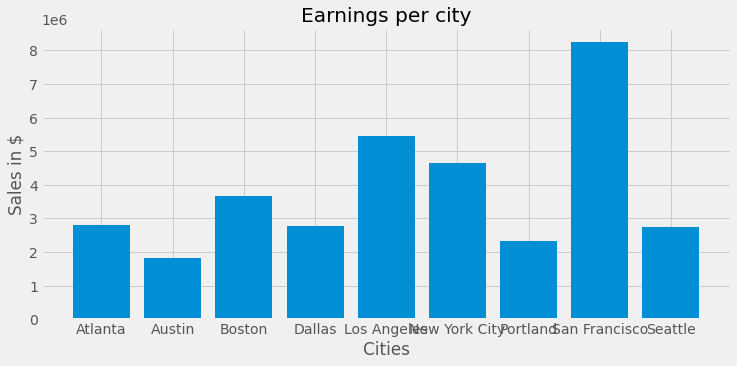

In [28]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(11, 5))
x_axis = ['Atlanta', 'Austin', 'Boston', 'Dallas', 'Los Angeles', 'New York City', 'Portland', 'San Francisco', 'Seattle']
y_axis = all_sales_df.groupby(all_sales_df['City'])['Sales'].sum()
plt.bar(x_axis, y_axis)
plt.xticks(ticks=x_axis)
plt.title('Earnings per city')
plt.xlabel('Cities')
plt.ylabel('Sales in $')

### Question 3: What time should we display advertisements to maximaze the likehood of customer's buying product?


In [29]:
all_sales_df['Hour'] = all_sales_df['Order Date'].dt.hour
all_sales_df.groupby(all_sales_df['Hour'])['Quantity Ordered'].sum()

Hour
0      4428
1      2619
2      1398
3       928
4       937
5      1493
6      2810
7      4556
8      7002
9      9816
10    12308
11    14005
12    14202
13    13685
14    12362
15    11391
16    11662
17    12229
18    13802
19    14470
20    13768
21    12244
22     9899
23     7065
Name: Quantity Ordered, dtype: int64

<AxesSubplot:xlabel='Hour', ylabel='Quantity Ordered'>

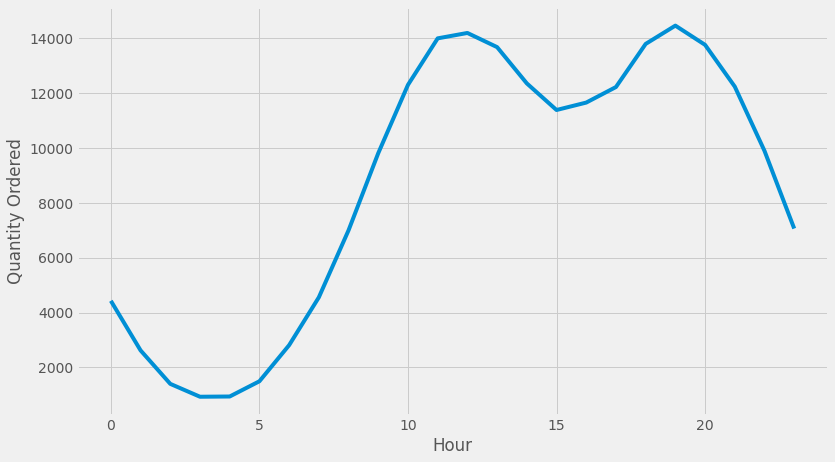

In [30]:
plt.figure(figsize=(12, 7))
sns.lineplot(data=all_sales_df.groupby(all_sales_df['Hour'])['Quantity Ordered'].sum())

### Question 4: What products are most often sold together?


In [31]:
all_sales_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas,8
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston,22
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles,14
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles,14
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles,9


In [32]:
# credit to https://github.com/Melvin0412/Sales_Data-Analysis-Project/blob/main/Sales_Data_Analysis_Project.ipynb
df = all_sales_df[all_sales_df['Order ID'].duplicated(keep= False)]

In [33]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles,14
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles,14
18,176574,Google Phone,1,600.00,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,600.00,Los Angeles,19
19,176574,USB-C Charging Cable,1,11.95,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,11.95,Los Angeles,19
30,176585,Bose SoundSport Headphones,1,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",4,99.99,Boston,11


In [34]:
# creating the 'Grouped' column
df['Grouped'] = df.groupby(df['Order ID'])['Product'].transform(lambda x : ",".join(x))
df.head()

<ipython-input-34-7fb5e8ae3a4b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Grouped'] = df.groupby(df['Order ID'])['Product'].transform(lambda x : ",".join(x))


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Grouped
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles,14,"Google Phone,Wired Headphones"
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles,14,"Google Phone,Wired Headphones"
18,176574,Google Phone,1,600.00,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,600.00,Los Angeles,19,"Google Phone,USB-C Charging Cable"
19,176574,USB-C Charging Cable,1,11.95,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,11.95,Los Angeles,19,"Google Phone,USB-C Charging Cable"
30,176585,Bose SoundSport Headphones,1,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",4,99.99,Boston,11,"Bose SoundSport Headphones,Bose SoundSport Hea..."


In [35]:
df = df[['Order ID', 'Grouped']]
df.drop_duplicates()
df['Grouped'].value_counts(ascending=False)

iPhone,Lightning Charging Cable         1764
Google Phone,USB-C Charging Cable       1712
iPhone,Wired Headphones                  722
Vareebadd Phone,USB-C Charging Cable     624
Google Phone,Wired Headphones            606
                                        ... 
LG Dryer,Google Phone                      2
27in 4K Gaming Monitor,LG Dryer            2
27in FHD Monitor,LG Washing Machine        2
iPhone,LG Washing Machine                  2
LG Washing Machine,20in Monitor            2
Name: Grouped, Length: 366, dtype: int64

### Question 5: What product sold the most? Why do you think it sold the most?


In [36]:
all_sales_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas,8
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston,22
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles,14
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles,14
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles,9


In [43]:
most_sold_product = all_sales_df.groupby(all_sales_df['Product'])['Quantity Ordered'].sum()
product_group = all_sales_df.groupby(all_sales_df['Product'])
products_sold = [product for product, df in product_group]

Text(0.5, 0, 'Quantity')

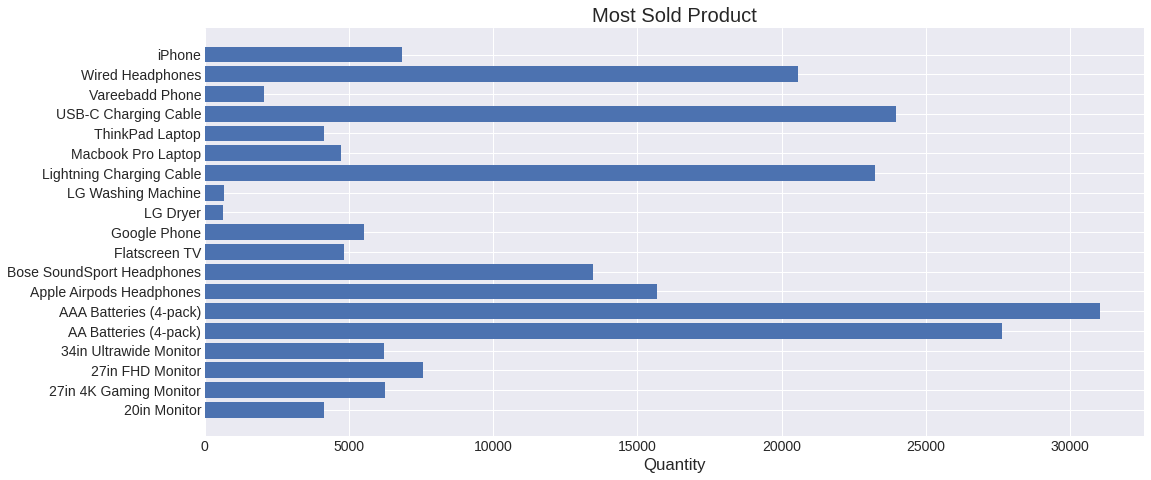

In [44]:
plt.style.use('seaborn-darkgrid')
plt.figure(figsize=(15, 7))
plt.barh(products_sold, most_sold_product)
plt.title('Most Sold Product')
plt.xlabel('Quantity')